In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.style.use('dark_background')

---------------------------------
Theta coordinates have a size of 129.
Radial coordinates have a size of 64.
Phirth_n0 has a size of (129, 64).
---------------------------------
Outputting general dataset information.
<xarray.Dataset> Size: 146kB
Dimensions:       (zeta: 9, r: 64, theta: 129)
Dimensions without coordinates: zeta, r, theta
Data variables:
    Phirphi       (zeta, r) float64 5kB 0.0 2.28e-05 8.62e-05 ... 2.104e-05 0.0
    Phirth        (theta, r) float64 66kB 0.0 2.28e-05 ... 2.104e-05 0.0
    Phirth_n0     (theta, r) float64 66kB 0.0 2.28e-05 ... 2.104e-05 0.0
    Phithphi      (zeta, theta) float64 9kB 0.008587 0.008587 ... 0.008587
    code_version  float64 8B 40.0
    deltat        float64 8B 25.0
    iphi_Phi      int32 4B 0
    ir_Phi        int32 4B 31
    itheta_Phi    int32 4B 0
    time_diag     float64 8B 0.0


C:\Users\sethx\AppData\Local\Temp\ipykernel_3776\4160122938.py:29: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"Theta coordinates have a size of {dataset.dims["theta"]}.");
C:\Users\sethx\AppData\Local\Temp\ipykernel_3776\4160122938.py:30: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"Radial coordinates have a size of {dataset.dims["r"]}.");
C:\Users\sethx\AppData\Local\Temp\ipykernel_3776\4160122938.py:10: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To 

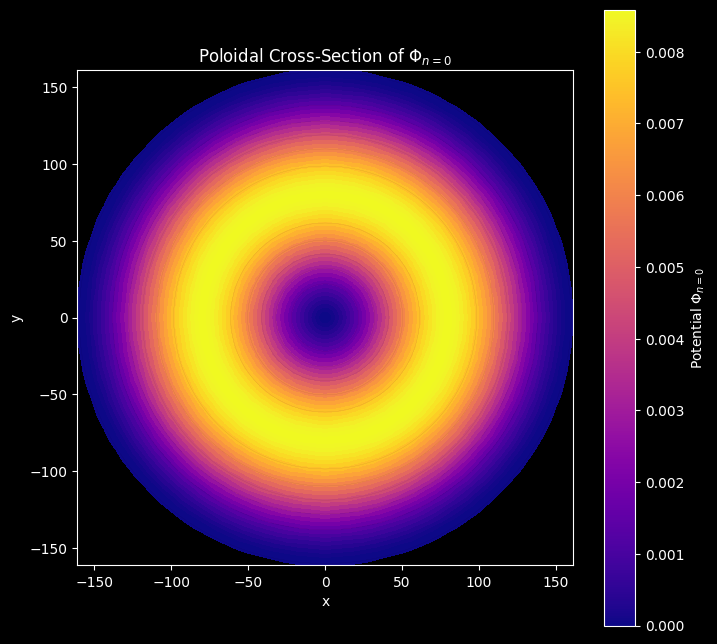

In [4]:
# Helper functions.
def convert_to_cartesian(r, theta):
	# Standard convention.
	x = r * np.cos(theta);
	y = r * np.sin(theta);
	return x, y;

def normalise_theta(phi2D_dataset):
	
	return np.linspace(0, 2 * np.pi, phi2D_dataset.dims["theta"]);

def normalise_radius(phi2D_dataset, minor_radius = 160):

	return np.linspace(0, minor_radius, phi2D_dataset.dims["r"]);

def fetch_data_from_h5(filepath):

	print_separator = lambda: print("---------------------------------");
	dataset = xr.open_dataset(filepath);
	# NB: As per the input file, Nr = 63, Ntheta = 128, Nphi = 8.
	# We match each `phony_dim` by comparing array sizes.
	dataset = dataset.rename(phony_dim_0 = "zeta", phony_dim_1 = "r", phony_dim_2 = "theta").load();
	# Discard size-1 dimensions.
	dataset = dataset.squeeze();

	## DEBUG: use this to query dataset dimensions.
	#print(dataset["Phirth_n0"])
	print_separator();
	print(f"Theta coordinates have a size of {dataset.dims["theta"]}.");
	print(f"Radial coordinates have a size of {dataset.dims["r"]}.");
	print(f"Phirth_n0 has a size of {dataset["Phirth_n0"].shape}.");

	## DEBUG: use this to show that theta is not periodic.
	#for entry in dataset["theta"].values: print(entry)

	## DEBUG: use this for general information.
	print_separator();
	print(f"Outputting general dataset information.");
	print(dataset);
	return dataset;

def generate_xy_grid(phi2D_dataset):
	
	theta_coords_naive = normalise_theta(phi2D_dataset);
	r_coords_naive = normalise_radius(phi2D_dataset);
	theta_coords, r_coords = np.meshgrid(theta_coords_naive, r_coords_naive, indexing="ij");
	x = r_coords * np.cos(theta_coords);
	y = r_coords * np.sin(theta_coords);
	return x, y;

def plot_phi2D(phi2D_dataset, x_coords, y_coords):

	phi2D = phi2D_dataset["Phirth_n0"].values;
	plt.figure(figsize=(8, 8))
	plt.contour(x_coords, y_coords, phi2D, colors = "k", linewidths = 0.1, alpha = 0.3)
	plt.pcolormesh(x_coords, y_coords, phi2D, shading = "nearest", cmap = "plasma");
	plt.gca().set_aspect('equal');
	plt.title(r'Poloidal Cross-Section of $\Phi_{n=0}$');
	plt.colorbar(label=r'Potential $\Phi_{n=0}$');
	plt.xlabel('x')
	plt.ylabel('y')
	plt.show();

# Main script logic.
dataset = fetch_data_from_h5("C:\\Workspace\\NSCC\\local copies\\h5 samples\\Phi2D_d00000.h5");
x, y = generate_xy_grid(dataset);
plot_phi2D(dataset, x, y);